In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Tutoring Courses/DCOMP4702
%ls
%cd PracW7/
%ls

Mounted at /content/drive
/content/drive/My Drive/Tutoring Courses/DCOMP4702
Loss.gslides  PracW3/  PracW5/  PracW7/
PracW2/       PracW4/  PracW6/  sml-book-draft-latest.pdf
/content/drive/My Drive/Tutoring Courses/DCOMP4702/PracW7
Untitled0.ipynb


[Epoch 1, Batch 200] loss: 2.286
[Epoch 1, Batch 400] loss: 2.035
[Epoch 1, Batch 600] loss: 0.691
[Epoch 1, Batch 800] loss: 0.401
[Epoch 2, Batch 200] loss: 0.294
[Epoch 2, Batch 400] loss: 0.260
[Epoch 2, Batch 600] loss: 0.206
[Epoch 2, Batch 800] loss: 0.190
[Epoch 3, Batch 200] loss: 0.167
[Epoch 3, Batch 400] loss: 0.146
[Epoch 3, Batch 600] loss: 0.140
[Epoch 3, Batch 800] loss: 0.130
[Epoch 4, Batch 200] loss: 0.124
[Epoch 4, Batch 400] loss: 0.109
[Epoch 4, Batch 600] loss: 0.106
[Epoch 4, Batch 800] loss: 0.107
[Epoch 5, Batch 200] loss: 0.092
[Epoch 5, Batch 400] loss: 0.092
[Epoch 5, Batch 600] loss: 0.087
[Epoch 5, Batch 800] loss: 0.089
[Epoch 6, Batch 200] loss: 0.075
[Epoch 6, Batch 400] loss: 0.086
[Epoch 6, Batch 600] loss: 0.082
[Epoch 6, Batch 800] loss: 0.085
[Epoch 7, Batch 200] loss: 0.076
[Epoch 7, Batch 400] loss: 0.070
[Epoch 7, Batch 600] loss: 0.069
[Epoch 7, Batch 800] loss: 0.065
[Epoch 8, Batch 200] loss: 0.066
[Epoch 8, Batch 400] loss: 0.071
[Epoch 8, 

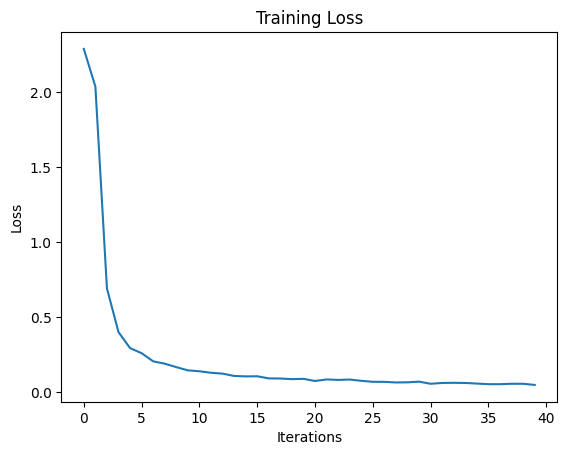

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the transforms to be applied to the MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

# Load the training set
trainset = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=64, shuffle=True, num_workers=2
)

# Define the convolutional neural network architecture
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 6, 5)
        self.pool = torch.nn.MaxPool2d(2, 2)
        self.conv2 = torch.nn.Conv2d(6, 16, 5)
        self.fc1 = torch.nn.Linear(16 * 4 * 4, 120)
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.pool(torch.nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network and optimizer
net = Net()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
losses1 = []
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:
            losses1.append(running_loss / 200)
            print(f"[Epoch {epoch+1}, Batch {i+1}] loss: {running_loss / 200:.3f}")
            running_loss = 0.0

# Plot the loss over time
plt.plot(losses1)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

[Epoch 1, Batch 200] loss: 1.956
[Epoch 1, Batch 400] loss: 0.854
[Epoch 1, Batch 600] loss: 0.518
[Epoch 1, Batch 800] loss: 0.408
[Epoch 2, Batch 200] loss: 0.345
[Epoch 2, Batch 400] loss: 0.325
[Epoch 2, Batch 600] loss: 0.311
[Epoch 2, Batch 800] loss: 0.299
[Epoch 3, Batch 200] loss: 0.274
[Epoch 3, Batch 400] loss: 0.279
[Epoch 3, Batch 600] loss: 0.258
[Epoch 3, Batch 800] loss: 0.228
[Epoch 4, Batch 200] loss: 0.231
[Epoch 4, Batch 400] loss: 0.223
[Epoch 4, Batch 600] loss: 0.215
[Epoch 4, Batch 800] loss: 0.214
[Epoch 5, Batch 200] loss: 0.202
[Epoch 5, Batch 400] loss: 0.197
[Epoch 5, Batch 600] loss: 0.197
[Epoch 5, Batch 800] loss: 0.182
[Epoch 6, Batch 200] loss: 0.170
[Epoch 6, Batch 400] loss: 0.176
[Epoch 6, Batch 600] loss: 0.171
[Epoch 6, Batch 800] loss: 0.165
[Epoch 7, Batch 200] loss: 0.152
[Epoch 7, Batch 400] loss: 0.163
[Epoch 7, Batch 600] loss: 0.154
[Epoch 7, Batch 800] loss: 0.142
[Epoch 8, Batch 200] loss: 0.142
[Epoch 8, Batch 400] loss: 0.148
[Epoch 8, 

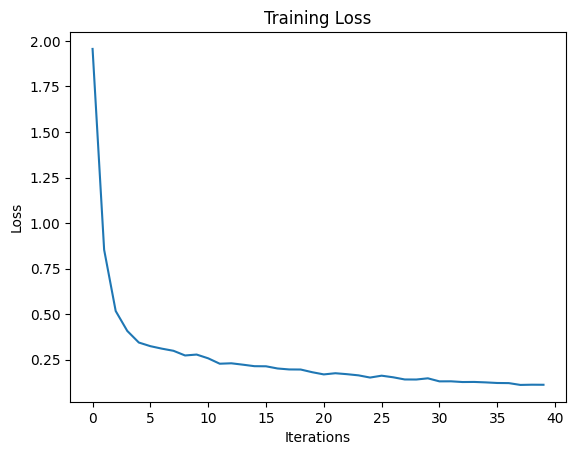

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the transforms to be applied to the MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

# Load the training set
trainset = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=64, shuffle=True, num_workers=2
)

# Define the MLP architecture
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(784, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network and optimizer
net = Net()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
losses = []
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:
            losses.append(running_loss / 200)
            print(f"[Epoch {epoch+1}, Batch {i+1}] loss: {running_loss / 200:.3f}")
            running_loss = 0.0

# Plot the loss over time
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()


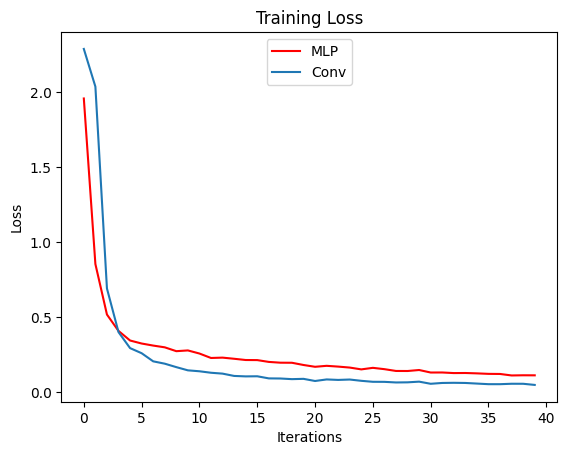

In [8]:
plt.plot(losses,label="MLP",color="red")
plt.plot(losses1,label="Conv")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss")
leg = plt.legend(loc='upper center')
plt.show()